# Project Ensemble Techniques
## By Ajay Kumar

• DOMAIN: Telecom

• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can 
analyse all relevant customer data and develop focused customer retention programs.

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column 
Metadata. The data set includes information about:

• Customers who left within the last month – the column is called Churn

• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
protection, tech support, and streaming TV and movies

• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
charges, and total charges

• Demographic info about customers – gender, age range, and if they have partners and dependents

## Importing the necessary libraries

In [650]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 1. Import and warehouse data:
• Import all the given datasets from MYSQL server. Explore shape and size. 

• Merge all datasets onto one and explore final shape and size.

In [651]:
# SQL Libraries

# pip install mysql-connector-python-rf
# pip install PyMySQL

# Open terminal in anaconda prompt and copy "conda install -c anaconda mysql-connector-python"
import mysql.connector

# importing 'mysql.connector' as mysql for convenient
import mysql.connector as mysql

# open terminal in anaconda prompt and put "pip install PyMySQL"
import pymysql.cursors
import pymysql



# Connection setup
MYSQL_Connection = pymysql.connect(host='localhost',
                             user='root',
                             password='aJay@212074',
                             db='telcomcustomer'
                             )

print(MYSQL_Connection)

# Create a Cursor object to execute queries.
cur1 = MYSQL_Connection.cursor()
cur2 = MYSQL_Connection.cursor()
 
# Select data from table using SQL query.
cur1.execute("SELECT * FROM telcomcustomerchurn1")
cur2.execute("SELECT * FROM telcomcustomerchurn2")

# Import data from MY SQL server

import numpy as np
import pandas as pd


DB_1 = pd.read_sql('SELECT * FROM telcomcustomerchurn1', con=MYSQL_Connection)
DB_2 = pd.read_sql('SELECT * FROM telcomcustomerchurn2', con=MYSQL_Connection)

DB_1.head()
DB_2.head()

print("Data 1:",DB_1.shape)
print("\nData 2:",DB_2.shape)

DB_Original = pd.concat([DB_1, DB_2], axis=1, sort=False) 
DB=DB_Original.copy(deep=True) # Backup the original data
DB.head()
print("\nConcatenated Data :",DB.shape)

Data 1: (7043, 10)

Data 2: (7032, 11)

Concatenated Data : (7043, 21)


After merging all the dataset the final shape is (7043,21) i.e dataset has 7043 entries and 21 atributes

In [652]:
# Making a copy of dataset
df = DB.copy(deep=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [653]:
# Drpoing the feature customerID which is not relevant
df.drop('customerID', 1, inplace=True)

# 2. Data cleansing:

• Missing value treatment

• Convert categorical attributes to continuous using relevant functional knowledge

• Drop attribute/s if required using relevant functional knowledge

• Automate all the above steps

In [654]:
# Checking information of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


The dataset has some null values.

The data types of features are 1 float, 2 integer and 18 object 

Most of the features are categorical in nature.

In [655]:
# Checking for the null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

The Dataset has no has some null values. Replacing the null by mean, median and mode.

In [656]:
# Checking for the duplicate values
df.duplicated().sum()

0

The Dataset has no duplicate values

In [657]:
# Checking for the noise and no. of levels in the atributes
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    3488
Male      3555
Name: gender, dtype: int64


PARTNER :  2
Yes    3402
No     3641
Name: Partner, dtype: int64


DEPENDENTS :  2
Yes    2110
No     4933
Name: Dependents, dtype: int64


PHONESERVICE :  2
No      682
Yes    6361
Name: PhoneService, dtype: int64


MULTIPLELINES :  3
No phone service     682
Yes                 2971
No                  3390
Name: MultipleLines, dtype: int64


INTERNETSERVICE :  3
No             1526
DSL            2421
Fiber optic    3096
Name: InternetService, dtype: int64


ONLINESECURITY :  3
No internet service    1526
Yes                    2019
No                     3498
Name: OnlineSecurity, dtype: int64


ONLINEBACKUP :  3
No internet service    1520
Yes                    2425
No                     3087
Name: OnlineBackup, dtype: int64


DEVICEPROTECTION :  3
No internet service    1520
Yes                    2418
No                     3094
Name: DeviceProtection, dtype: int64


TECHSUPPORT :  3
No internet service    

The value counts of the categorical variable tells us the no. of levels and the distribution of the class in each features

In [658]:
# Replacing the missing entry with median and mode of the columns
df['OnlineBackup'] = df['OnlineBackup'].fillna(df['OnlineBackup'].mode()[0])
df['DeviceProtection'] = df['DeviceProtection'].fillna(df['DeviceProtection'].mode()[0])
df['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])
df['StreamingTV'] = df['StreamingTV'].fillna(df['StreamingTV'].mode()[0])
df['StreamingMovies'] = df['StreamingMovies'].fillna(df['StreamingMovies'].mode()[0])
df['Contract'] = df['Contract'].fillna(df['Contract'].mode()[0])
df['PaperlessBilling'] = df['PaperlessBilling'].fillna(df['PaperlessBilling'].mode()[0])
df['PaymentMethod'] = df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0])
df['Churn'] = df['Churn'].fillna(df['Churn'].mode()[0]) 
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [659]:
df.isnull().sum().any()

False

Now the dataset has no null values

In [660]:
# Defining a function to check the levels of categorical features
def unique_features(categorical):
    print(categorical, '---', df[categorical].unique())
    
data_object = df.select_dtypes(['object'])
for i in range(0, len(data_object.columns)):
    unique_features(data_object.columns[i])

gender --- ['Female' 'Male']
Partner --- ['Yes' 'No']
Dependents --- ['No' 'Yes']
PhoneService --- ['No' 'Yes']
MultipleLines --- ['No phone service' 'No' 'Yes']
InternetService --- ['DSL' 'Fiber optic' 'No']
OnlineSecurity --- ['No' 'Yes' 'No internet service']
OnlineBackup --- ['Yes' 'No' 'No internet service']
DeviceProtection --- ['No' 'Yes' 'No internet service']
TechSupport --- ['No' 'Yes' 'No internet service']
StreamingTV --- ['No' 'Yes' 'No internet service']
StreamingMovies --- ['No' 'Yes' 'No internet service']
Contract --- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --- ['Yes' 'No']
PaymentMethod --- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --- ['No' 'Yes']


The categorical features with No internet service and No phone service has the same meaning as No so replacing this with No.

In [661]:
df.replace(to_replace='No internet service', value='No', inplace=True)
df.replace(to_replace='No phone service', value='No', inplace=True)
for i in range(0, len(data_object.columns)):
    unique_features(data_object.columns[i])

gender --- ['Female' 'Male']
Partner --- ['Yes' 'No']
Dependents --- ['No' 'Yes']
PhoneService --- ['No' 'Yes']
MultipleLines --- ['No' 'Yes']
InternetService --- ['DSL' 'Fiber optic' 'No']
OnlineSecurity --- ['No' 'Yes']
OnlineBackup --- ['Yes' 'No']
DeviceProtection --- ['No' 'Yes']
TechSupport --- ['No' 'Yes']
StreamingTV --- ['No' 'Yes']
StreamingMovies --- ['No' 'Yes']
Contract --- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --- ['Yes' 'No']
PaymentMethod --- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --- ['No' 'Yes']


In [662]:
# creating a copy of the dataset
data = df.copy(deep=True)

In [663]:
# Performing Label Encoding for unique values of the variables as they are all categorical
from sklearn.preprocessing import LabelEncoder
data_object=data.select_dtypes(['object'])
def labelencode(columnlabel):
    data[columnlabel] = LabelEncoder().fit_transform(data[columnlabel])

for i in range(0,len(data_object.columns)):
    labelencode(data_object.columns[i])


In [664]:
print(data.shape)
data.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Here, I have label encode the categorical variable for further analysis**

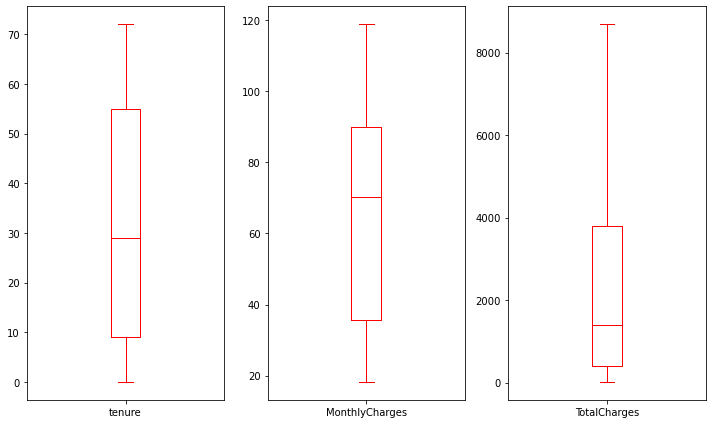

In [665]:
col =['tenure','MonthlyCharges','TotalCharges']
data[col].plot(kind='box', subplots=True, figsize=(10,6), color='red')
plt.tight_layout()
plt.show()

The above boxplot says ther is no outliers in the atributes

## Feature selection using ExtraTreesClassifier

[0.03830204 0.02432013 0.03206827 0.02914989 0.10596856 0.01466786
 0.02926369 0.04948983 0.0291067  0.02523655 0.02514908 0.03148951
 0.02302366 0.02311432 0.11623988 0.03388108 0.06425601 0.15316873
 0.15210421]


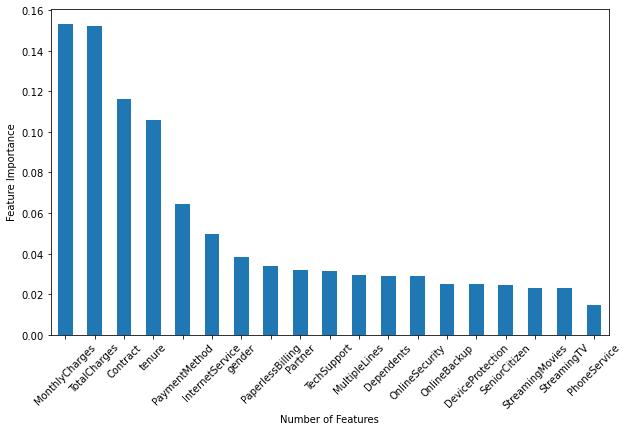

In [666]:
feature_data = data.copy(deep=True)
X= feature_data.drop('Churn', axis=1)
Y = feature_data.pop('Churn')

from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar', figsize=(10,6))
plt.xlabel('Number of Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [667]:
# Droping the atributes based on the above barh grapg which have a very less contribution in model building
data.drop('PhoneService', axis=1, inplace =True)

# 3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [668]:
data[col].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.806879,2281.916928
std,24.559481,30.063266,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


**Statistical summary states that mean and standard deviation of the atributes are not in one scale**

**Minimum tenure is 0 and maximum is 72 months**

**The Dataset needs to be normalized**

# Univariate Analysis

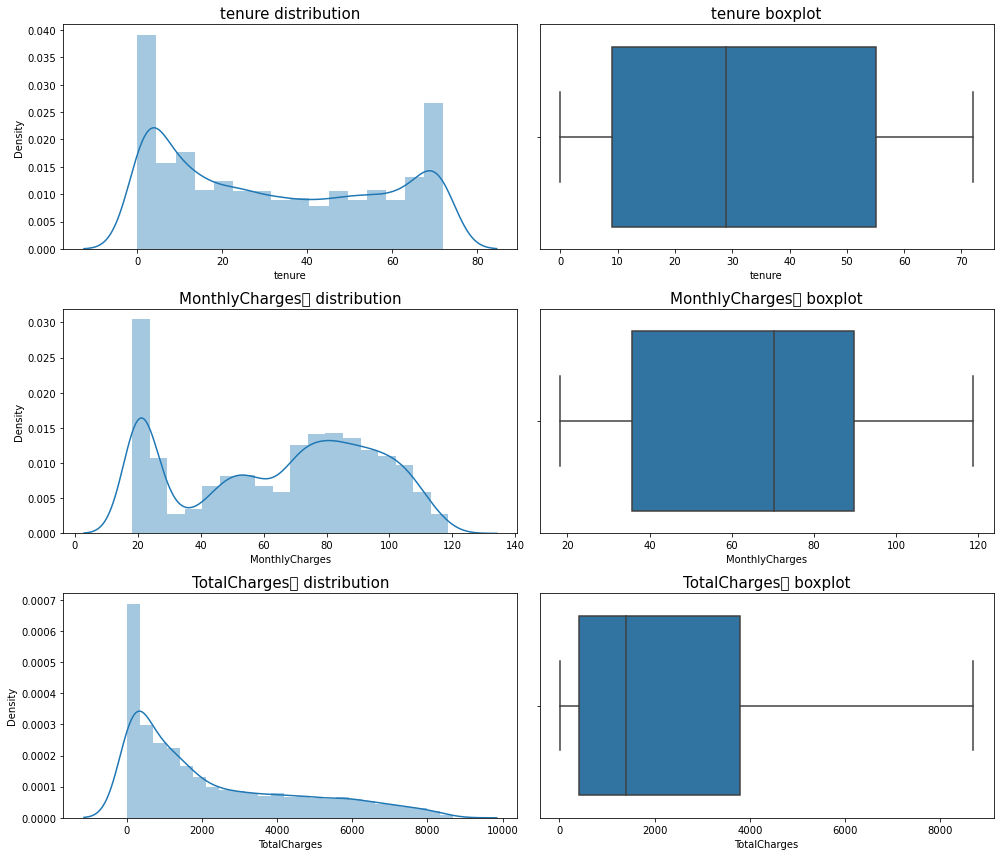

In [669]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(14,12)
a = sns.distplot(data['tenure'], ax=axes[0][0]);
a.set_title('tenure distribution', fontsize=15)

a = sns.boxplot(data['tenure'], ax=axes[0][1]);
a.set_title('tenure boxplot', fontsize=15)

a = sns.distplot(data['MonthlyCharges'], ax=axes[1][0]);
a.set_title('MonthlyCharges	 distribution', fontsize=15)

a = sns.boxplot(data['MonthlyCharges'], ax=axes[1][1]);
a.set_title('MonthlyCharges	 boxplot', fontsize=15)

a = sns.distplot(data['TotalCharges'], ax=axes[2][0]);
a.set_title('TotalCharges	 distribution', fontsize=15)

a = sns.boxplot(data['TotalCharges'], ax=axes[2][1]);
a.set_title('TotalCharges	 boxplot', fontsize=15)

plt.tight_layout()
plt.show()


Tenure: The data looks uniformally distributed with two peaks at bottom and top. It has no outliers

MonthlyCharges: Slightly right skewed with no outliers

TotalCharges: Highlly skewed towards right side and no outliers

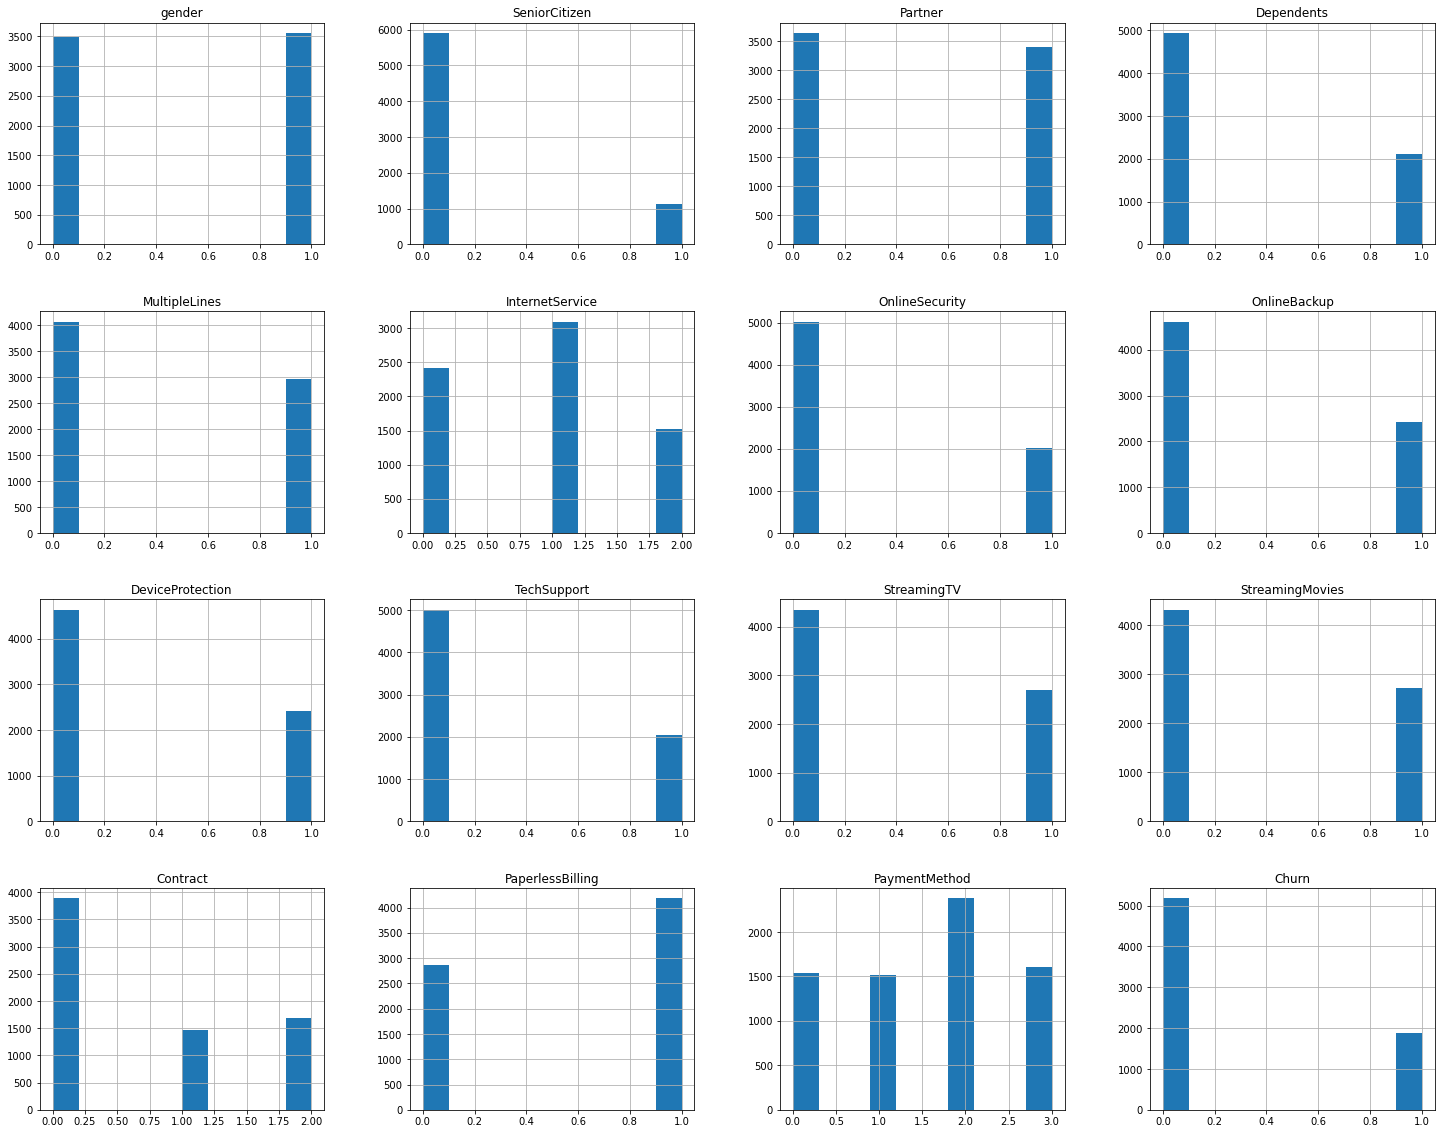

In [670]:
# Histogram represantaion of all the categorical features
from pylab import rcParams
rcParams['figure.figsize'] = 25,20
cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 
       'PaperlessBilling', 'PaymentMethod', 'Churn']
data[cat].hist();

Features have 2 or 3 classes

The class of most of the features are not balanced.

# Bivariate Analysis

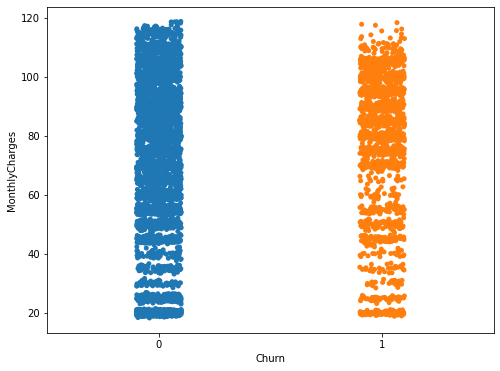

In [671]:
# Bivariate Analysis
plt.figure(figsize=(8,6))
sns.stripplot(x='Churn', y = 'MonthlyCharges', data = data, jitter=True);

The above boxplot says that if monthly charges is high the chances of churning is also high

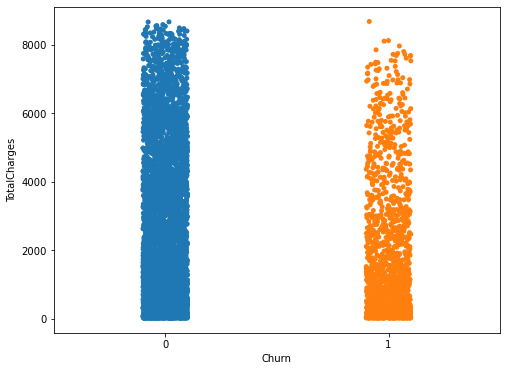

In [672]:
# Bivariate Analysis
plt.figure(figsize=(8,6))
sns.stripplot(x='Churn', y = 'TotalCharges', data = data, jitter=True);

The customer who have the posibility of churning if the TotalCharges are below 4000.

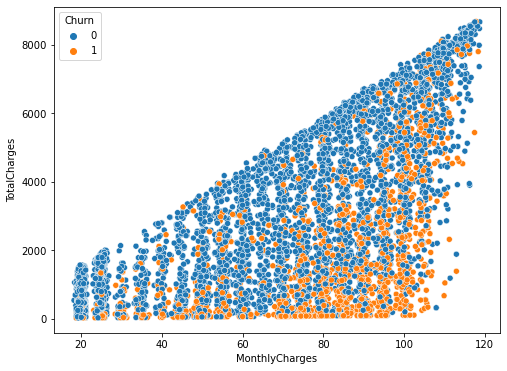

In [673]:
# Bivariate Analysis
plt.figure(figsize=(8,6))
sns.scatterplot(x='MonthlyCharges', y = 'TotalCharges', data = data, hue='Churn');

There is a strong +ve linear corelation between these two varibles. There is high variance in the dataset also.

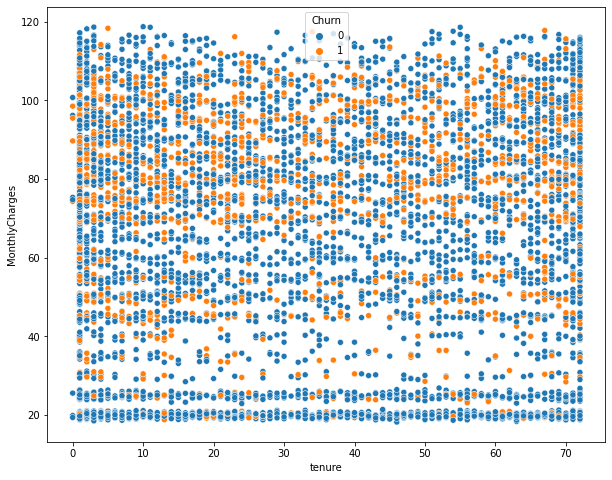

In [674]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.scatterplot(x='tenure', y = 'MonthlyCharges', data = data, hue='Churn');

**This scatterplot indicates that ther is a high variance in dataset for predicting the class of target and they are distributed like cloud**

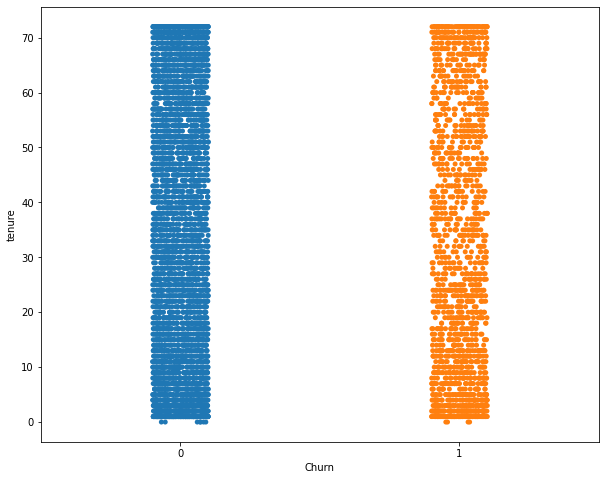

In [675]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.stripplot(x='Churn', y = 'tenure', data = data, jitter=True);

**This feature is not a good predictor for target**

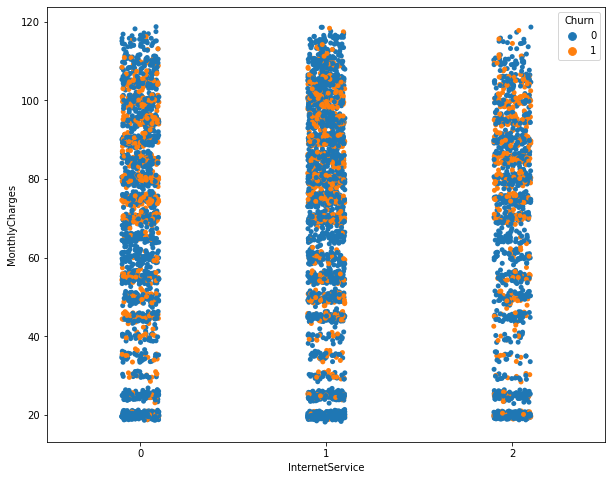

In [676]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.stripplot(x='InternetService', y = 'MonthlyCharges', data = data, jitter=True, hue='Churn');

**The above plot says the probability of churning of the customer is more if the charges are more for all the class of InternetService**

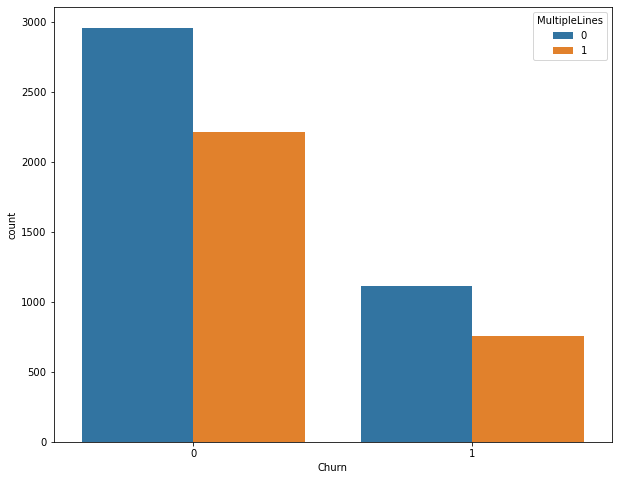

In [677]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", hue="MultipleLines", data=data);

The customer having MultipleLines has the probability of churning. This feature is required for prediction

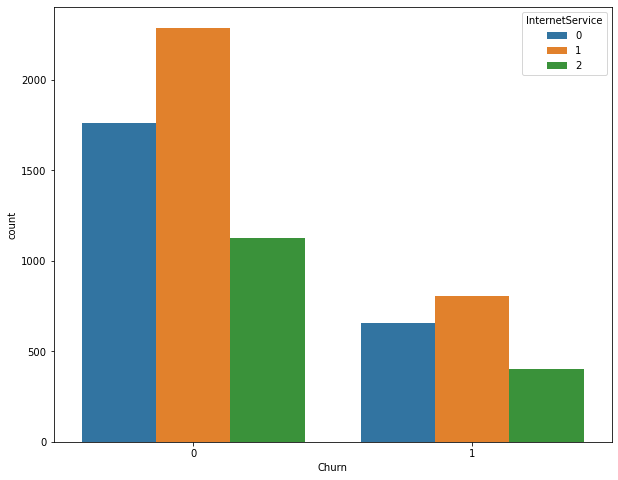

In [678]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", hue="InternetService", data=data);

The above figure says customer with InternetService has also probability of churning

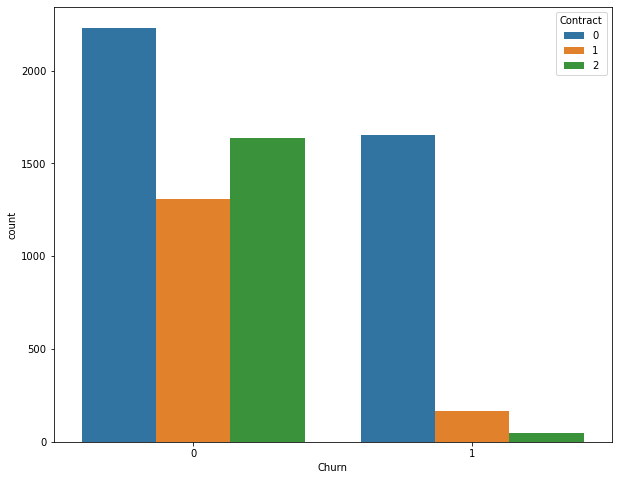

In [679]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", hue="Contract", data=data);

**Contact is also a good contributer for predicting the churn for the customer who belongs to month-to-month (Zero) contract**

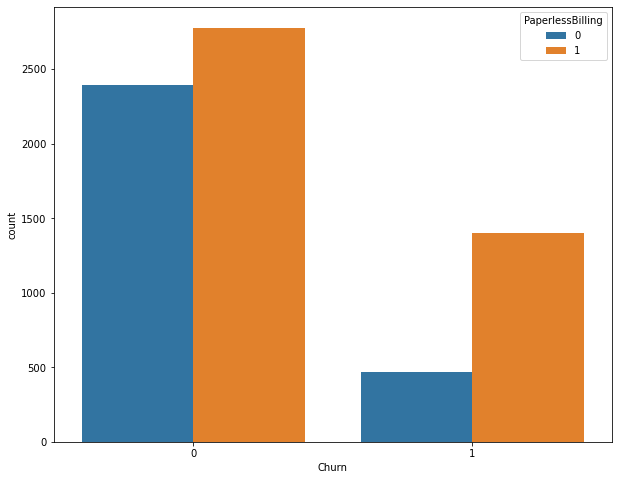

In [680]:
# Bivariate Analysis
plt.figure(figsize=(10,8))
sns.countplot(x="Churn", hue="PaperlessBilling", data=data);

PaperlessBilling is also a good predictor for churn

## Multivariate Analysis


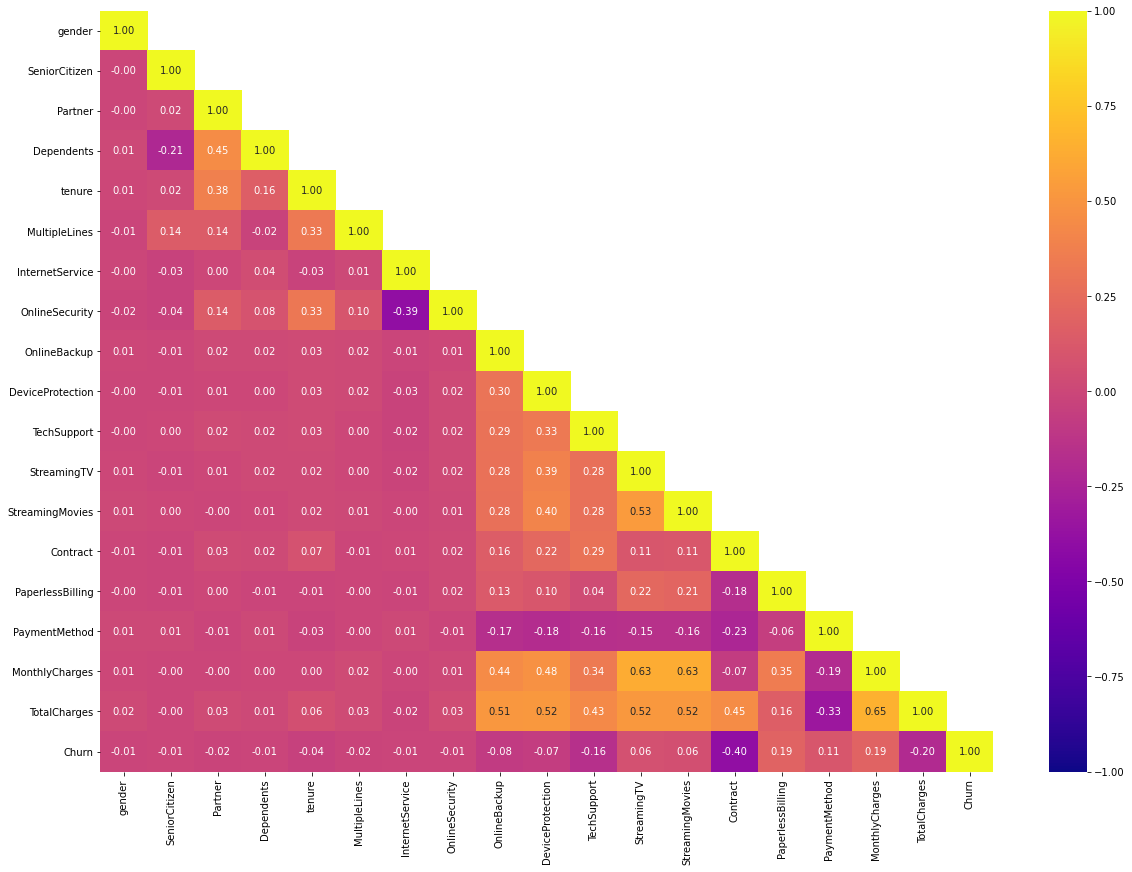

In [681]:
# Corelation Heatmap
plt.figure(figsize=(20,14))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, cmap='plasma',fmt='.2f', mask=np.triu(data.corr(), +1));

**The corelation heatmap indicates that the features are +vely and -vely corelated with each other**

**TotalCharges and MonthlyCharges are highlty +ve corealated to each other**

**There is -ve corelation between churn and contract**

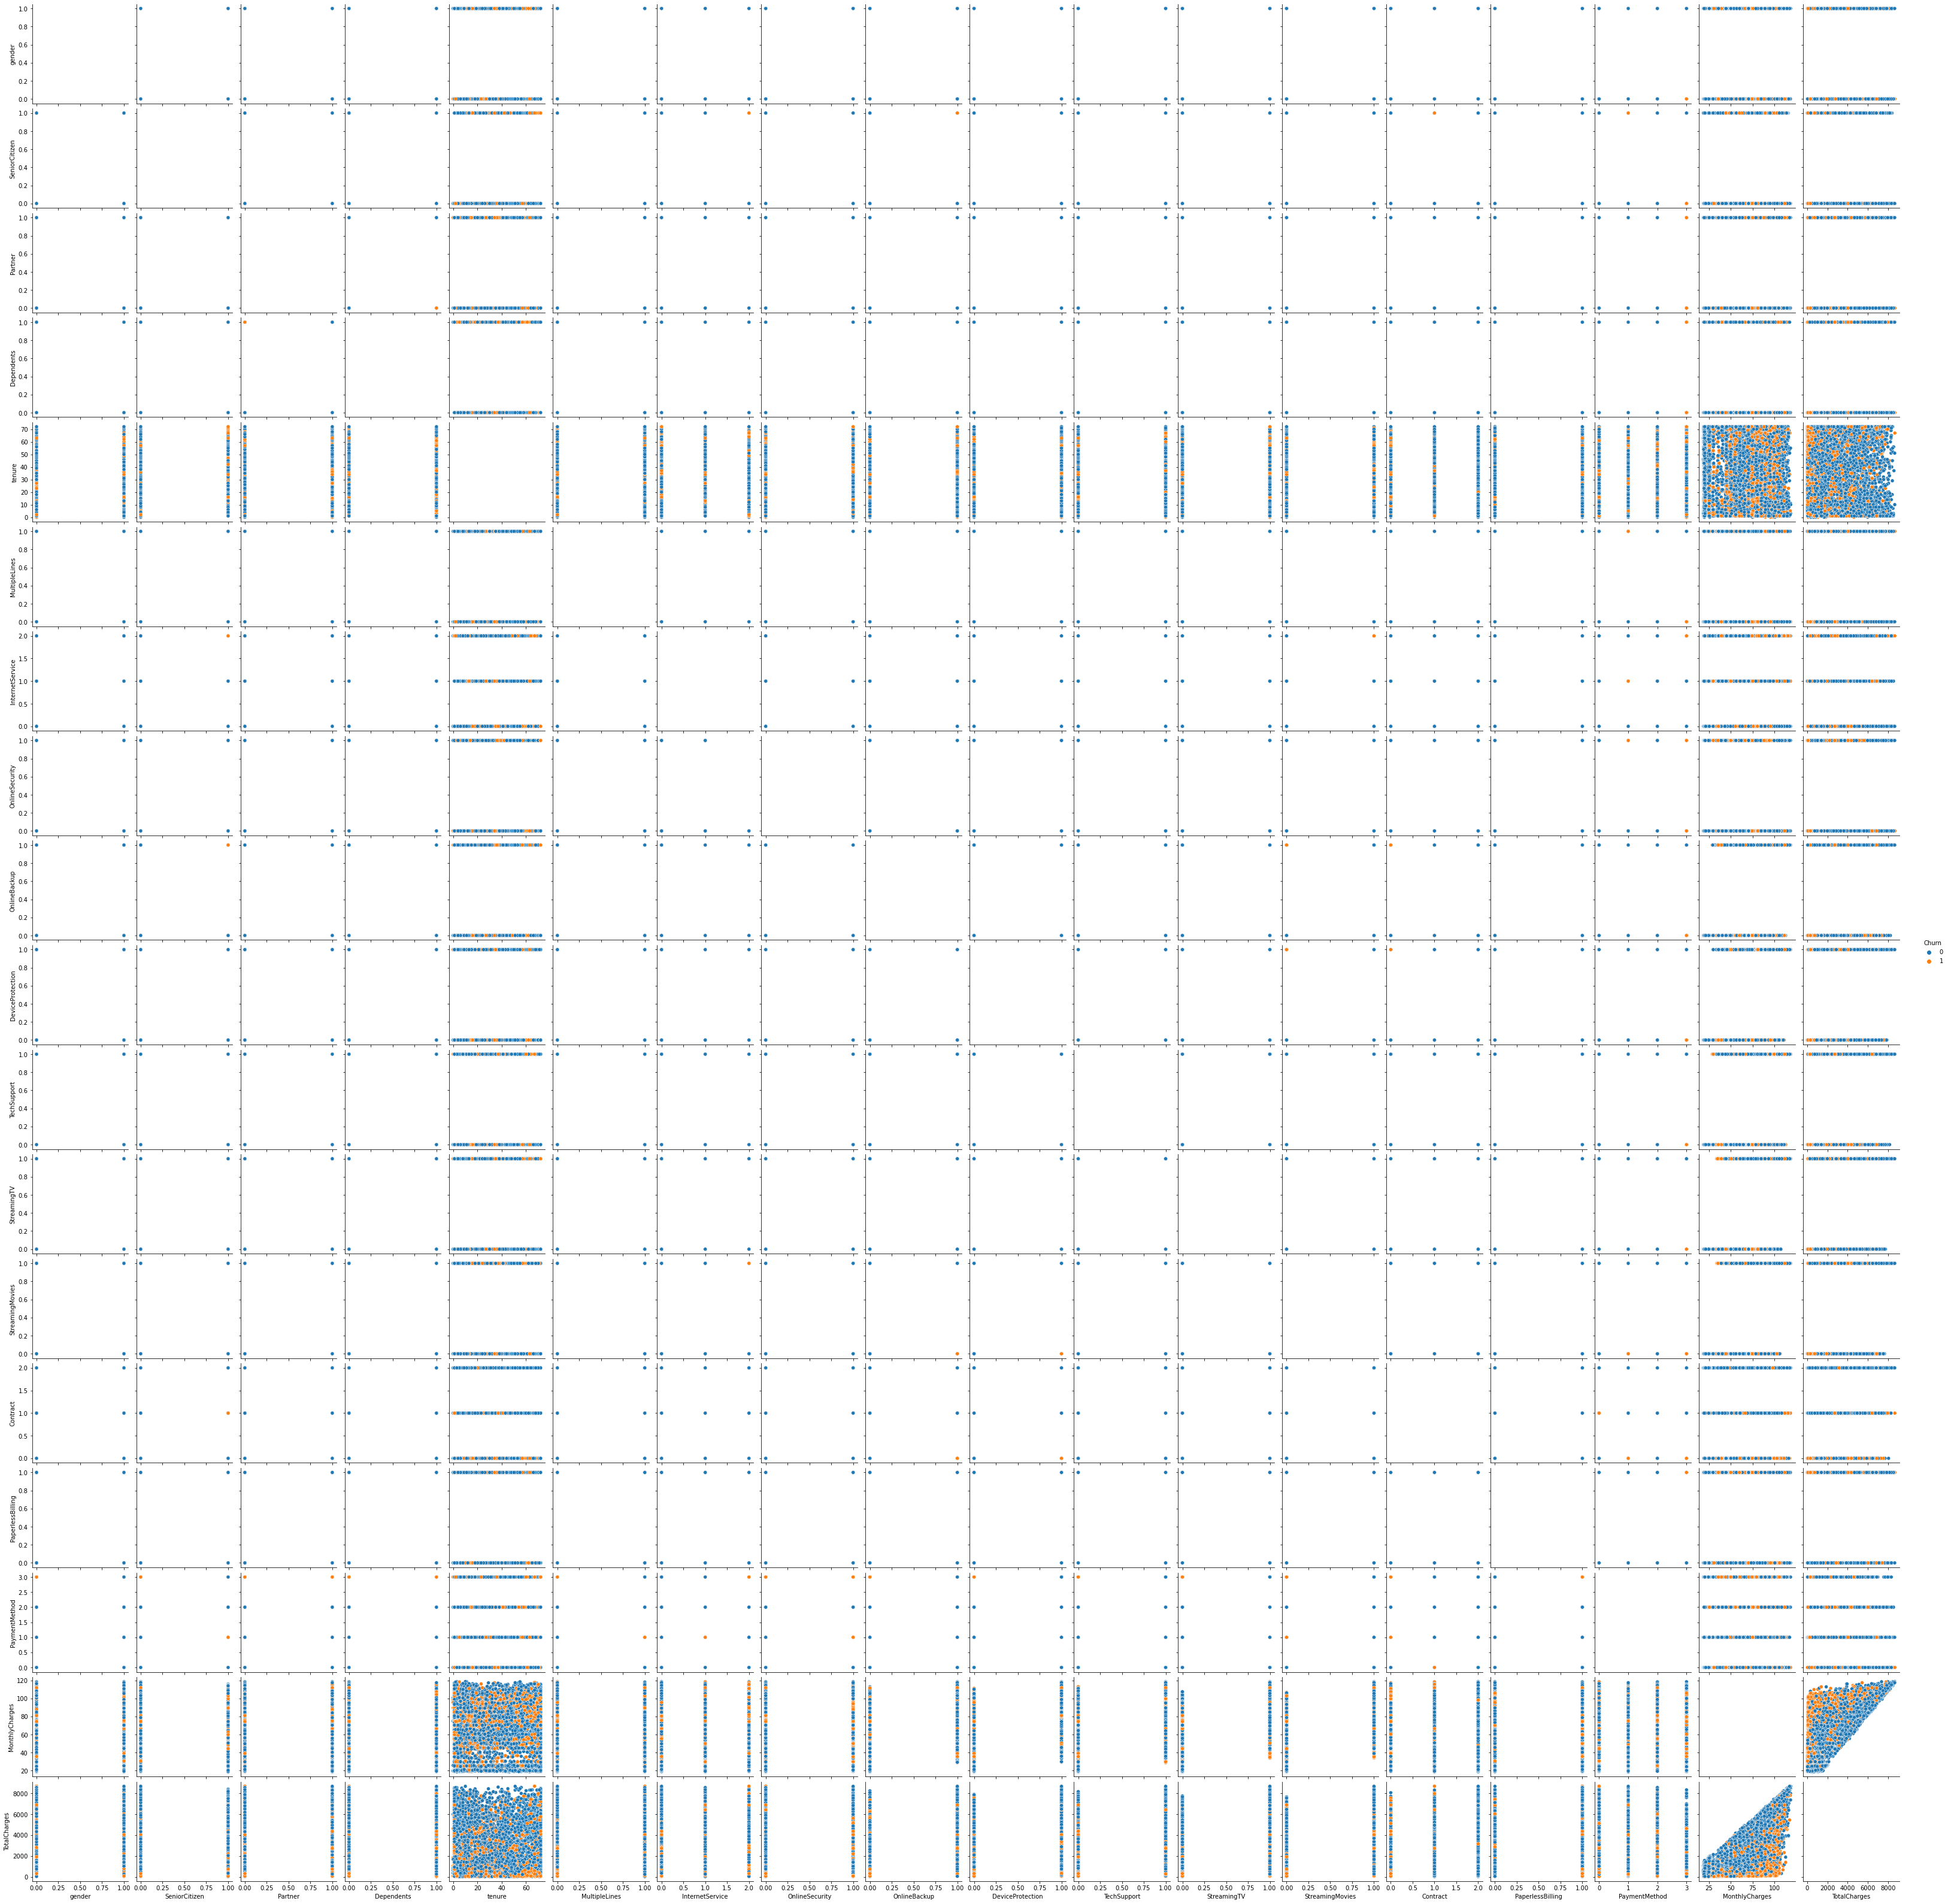

In [682]:
# Pairplot of the feeatures
sns.pairplot(data, diag_kind=True, hue='Churn');

**The Pairplot is not giving much information exept some +ve corelation between MonthlyCharges and TotalCharges**

## Creating dummies for categorical variables

In [685]:
cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']

data = pd.get_dummies(data, columns=cat, drop_first=True)
print(data.shape)
data.head()

(7043, 23)


,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,MultipleLines_1,InternetService_1,...,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,29.85,29.85,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [686]:
# Duplicates are created after creating the dummies
data.duplicated().sum()

0

In [687]:
# Droping the duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## 4. Data pre-processing
• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

• Check if the train and test data have similar statistical characteristics when compared with original data.

In [688]:
# Scaling the variables as continuous variables have different weightage using min-max technique
num = ['TotalCharges','MonthlyCharges','tenure']
data[num] = data[num].apply(lambda x:(x-x.min()) / (x.max() - x.min()))
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_1,SeniorCitizen_1,Partner_1,Dependents_1,MultipleLines_1,InternetService_1,...,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0.013889,0.115423,0.001275,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0.215867,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0.027778,0.354229,0.010310,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0.210241,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,0.027778,0.521891,0.015330,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [689]:
# Segregate predictors vs target attributes
X = data.drop('Churn', axis=1)
y = data.pop('Churn')

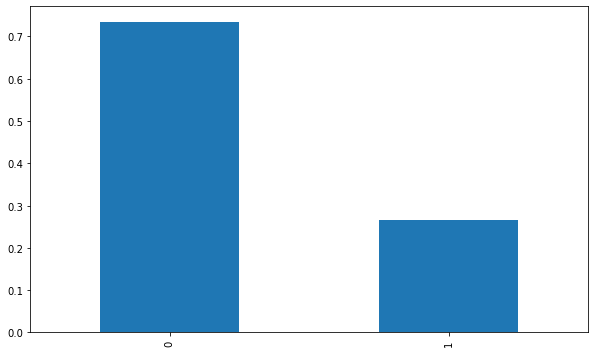

In [690]:
# Checking for target balancing
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
y.value_counts(normalize=True).plot(kind='bar');

**The target variable is imbalanced supporting 73% for class 1 and 27% for class 0**

In [691]:
# Performing train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y) 

In [692]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 22)
(5634,)
(1409, 22)
(1409,)


## Using SMOTE library from imblearn to generate synthetic the data for minority class

In [693]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1) #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [694]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1495
Before UpSampling, counts of label '0': 4139 

After UpSampling, counts of label '1': 4139
After UpSampling, counts of label '0': 4139 

After UpSampling, the shape of X_train: (8278, 22)
After UpSampling, the shape of y_train: (8278,) 



After using SMOTE library now both the classes for target variable is balanced which can be seen above i.e 3621 for each class. SMOTE has generated synthetic data for minority class

# 5. Model training, testing and tuning:

• Train and test all ensemble models taught in the learning module.

• Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers.

• Display the classification accuracies for train and test data.

• Apply all the possible tuning techniques to train the best model for the given data. 

• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

• Display and compare all the models designed with their train and test accuracies.

• Select the final best trained model along with your detailed comments for selecting this model. 

• Pickle the selected model for future use

## Decision Tree Model

In [695]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(random_state=1)
dTree_model = dTree.fit(X_train_res, y_train_res)

In [696]:
ytrain_predict = dTree_model.predict(X_train_res)
ytest_predict = dTree_model.predict(X_test)
dTree_train_score = dTree.score(X_train_res, y_train_res).round(3)
print(dTree_train_score)
dTree_test_score = dTree.score(X_test, y_test).round(3)
print(dTree_test_score)

1.0
0.713


**The model get overfitted as the tree has over grown because I have not done any hyperparameter tuning**

**Now I will regularise the tree by hyper parameter tuning**

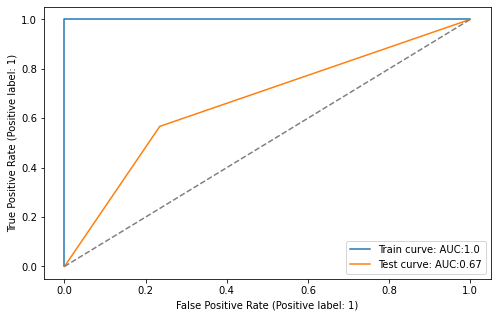

In [701]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = dTree_model.predict_proba(X_train_res)
test_predict_prob = dTree_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(dTree_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(dTree_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

**The model has got overfitted as there is no hyperparameter tuning done**

## Regularizing the Tree to over come overfitting

In [484]:
reg_tree = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=5, min_samples_split=15, ccp_alpha=.01,random_state=1)
reg_model = reg_tree.fit(X_train_res, y_train_res)

In [485]:
ytrain_predict = reg_model.predict(X_train_res)
ytest_predict = reg_model.predict(X_test)
regtree_train_score = reg_model.score(X_train_res, y_train_res).round(3)
print(regtree_train_score)
regtree_test_score = reg_model.score(X_test, y_test).round(3)
print(regtree_test_score)

0.773
0.724


**Now after prunning tree the model has come up with the accuracy of 74% and 64% for trainig and testing respectivily**

In [486]:
# Feature importance
pd.DataFrame(reg_model.feature_importances_, columns=['Importance'], index=X.columns).sort_values('Importance', ascending=False)

,Importance
Contract_2,0.494195
Contract_1,0.317763
MonthlyCharges,0.078489
TechSupport_1,0.061354
StreamingMovies_1,0.048199
tenure,0.000000
PaymentMethod_2,0.000000
PaymentMethod_1,0.000000
PaperlessBilling_1,0.000000
StreamingTV_1,0.000000


**The feature importance says the contact and monthly charges are good predictor for the target class

Training score: 0.773


              precision    recall  f1-score   support

           0       0.80      0.73      0.76      4139
           1       0.75      0.81      0.78      4139

    accuracy                           0.77      8278
   macro avg       0.77      0.77      0.77      8278
weighted avg       0.77      0.77      0.77      8278



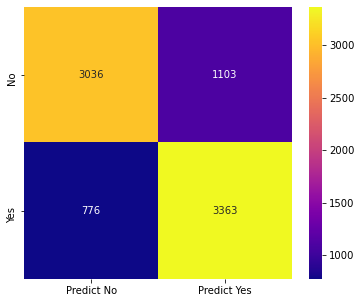

In [487]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import metrics
## Performance Matrix on train data set
print('Training score:',regtree_train_score)
cm = metrics.confusion_matrix(y_train_res, ytrain_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_train_res, ytrain_predict))

*Train data accuracy: 77%*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Not Churn' is 80% and 73% respectivily 

  The precision and recall is also good for predicting 'Churn' is 75% and 81% respectivily 

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 3363

True Negatives (TN): we correctly predicted for Fail is 3.36

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 1103 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 776 Falsely predict negative Type II error

Now lets check for testing data.

Testing score: 0.724


              precision    recall  f1-score   support

           0       0.88      0.72      0.79      1035
           1       0.49      0.74      0.59       374

    accuracy                           0.72      1409
   macro avg       0.68      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



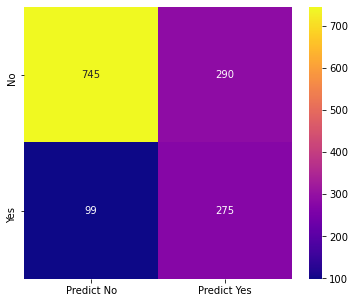

In [488]:
## Performance Matrix on test data set
print('Testing score:',regtree_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n') 
print(classification_report(y_test, ytest_predict))

*Testing data accuracy: 72% due to high variance in the dataset and class imbalance*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Not Churn' is 88% and 72% respectivily 

  The precision and recall is also good for predicting 'Churn' is 49% and 74% respectivily 

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 275

True Negatives (TN): we correctly predicted for Fail is 745

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 290 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 99 Falsely predict negative Type II error

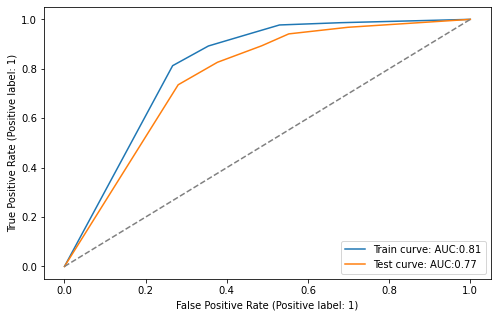

In [702]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = reg_model.predict_proba(X_train_res)
test_predict_prob = reg_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(reg_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(reg_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

**The overfitting has reduced after pruning**

## Random Forest Model

In [493]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(min_samples_leaf=5,random_state=1, class_weight={0:5,1:5}, 
                              criterion='entropy',min_samples_split=25)
rf_model = rfcl.fit(X_train_res, y_train_res)

In [494]:
ytrain_predict = rf_model.predict(X_train_res)
ytest_predict = rf_model.predict(X_test)
rf_train_score = rf_model.score(X_train_res, y_train_res).round(3)
rf_test_score = rf_model.score(X_test, y_test).round(3)
print(rf_train_score)
print(rf_test_score)

0.868
0.746


Training score: 0.868


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4139
           1       0.84      0.91      0.87      4139

    accuracy                           0.87      8278
   macro avg       0.87      0.87      0.87      8278
weighted avg       0.87      0.87      0.87      8278



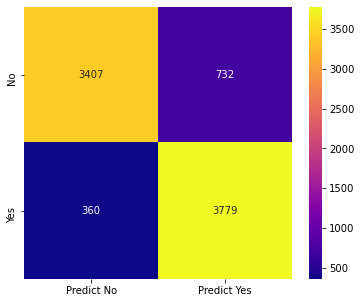

In [495]:
## Performance Matrix on train data set
print('Training score:',rf_train_score)
cm = metrics.confusion_matrix(y_train_res, ytrain_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_train_res, ytrain_predict))

Training score: 0.746


              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



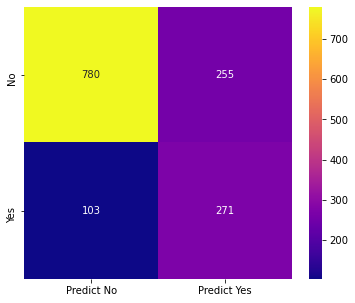

In [496]:
## Performance Matrix on test data set
print('Training score:',rf_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The Random Forest model is giving slightly better 75% accuracy on testing data**

**The Precision for the class 1 has improvev to 52% where as recall is giving score of 72%**

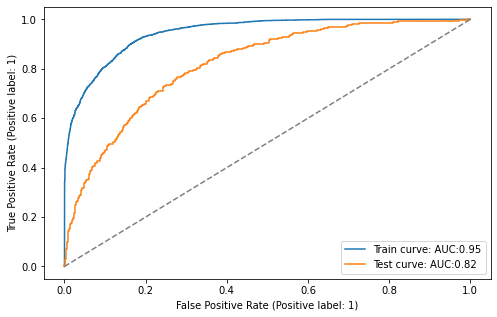

In [703]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = rf_model.predict_proba(X_train_res)
test_predict_prob = rf_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(rf_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(rf_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

**There is a slight overfitting in FR model due to over grown**

## Bagging

In [514]:
from sklearn.ensemble import BaggingClassifier
rf = RandomForestClassifier(criterion='entropy')
Bagg_model = BaggingClassifier(base_estimator=rf, 
                                max_samples=.6,
                                max_features=.6,
                                bootstrap=True,
                                bootstrap_features=False,
                                oob_score=False)

Bagg_model = Bagg_model.fit(X_train_res, y_train_res)

In [515]:
ytrain_predict = Bagg_model.predict(X_train_res)
ytest_predict = Bagg_model.predict(X_test)
Bagg_train_score = Bagg_model.score(X_train_res, y_train_res).round(3)
Bagg_test_score = Bagg_model.score(X_test, y_test).round(3)
print(Bagg_train_score)
print(Bagg_test_score)

0.95
0.753


Training score: 0.95


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4139
           1       0.93      0.97      0.95      4139

    accuracy                           0.95      8278
   macro avg       0.95      0.95      0.95      8278
weighted avg       0.95      0.95      0.95      8278



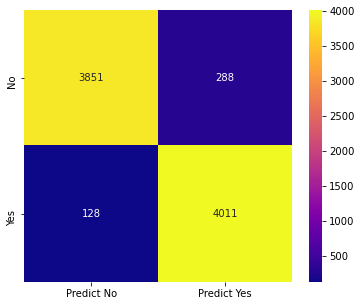

In [516]:
 ## Performance Matrix on train data set
print('Training score:',Bagg_train_score)
cm = metrics.confusion_matrix(y_train_res, ytrain_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_train_res, ytrain_predict))

Testing score: 0.753


              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.70      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409



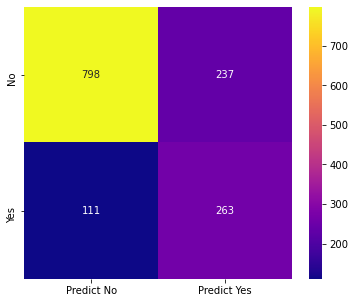

In [517]:
## Performance Matrix on test data set
print('Testing score:',Bagg_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The Bagging Model is slightly get overfitted on Training Data**

**The Bagging model is giving 75% accuracy on testing data**

**The Precision for the class 1 is 53% where as recall is giving score of 70%**

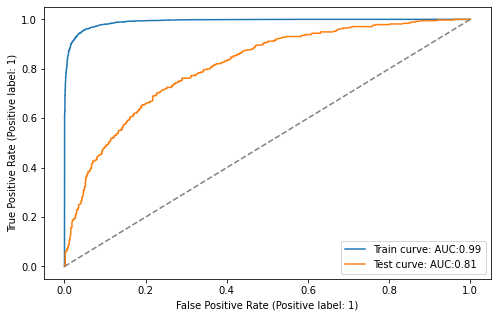

In [704]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = Bagg_model.predict_proba(X_train_res)
test_predict_prob = Bagg_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(Bagg_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(Bagg_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

**The Bagging model has also slightly facing the overfitting issue due to the class imbalance**

## Discriminant Analysis

In [625]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [626]:
ytrain_predict = LDA_model.predict(X_train_res)
ytest_predict = LDA_model.predict(X_test)
LDA_train_score = LDA_model.score(X_train_res, y_train_res).round(3)
LDA_test_score = LDA_model.score(X_test, y_test).round(3)
print(LDA_train_score)
print(LDA_test_score)

0.778
0.733


Testing score: 0.733


              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1035
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409



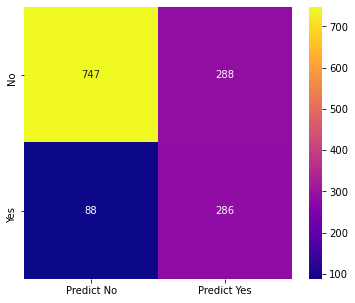

In [627]:
## Performance Matrix on test data set
print('Testing score:',LDA_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The LDA model is giving slightly lower to above i.e 73% accuracy on testing data**

**The Precision for the class 1 has improvev to 49% where as recall is giving score of 76%**

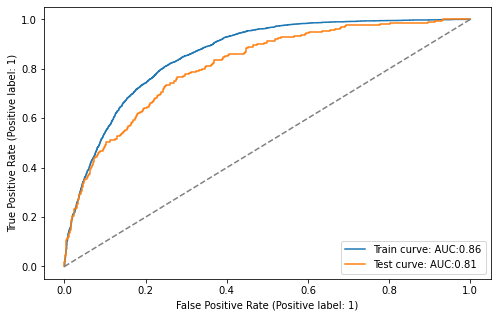

In [705]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = LDA_model.predict_proba(X_train_res)
test_predict_prob = LDA_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(LDA_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(LDA_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

**There is no overfitting in LDA model but the performance is poor in precision**

## Ada Boost Classifier

In [525]:
from sklearn.ensemble import AdaBoostClassifier
rf =RandomForestClassifier()
ADB_model = AdaBoostClassifier(random_state=1,
                              n_estimators=50,
                              learning_rate=0.5)
ADB_model.fit(X_train_res, y_train_res)

AdaBoostClassifier(learning_rate=0.5, random_state=1)

In [526]:
ytrain_predict = ADB_model.predict(X_train_res)
ytest_predict = ADB_model.predict(X_test)
ADB_train_score = ADB_model.score(X_train_res, y_train_res).round(3)
ADB_test_score = ADB_model.score(X_test, y_test).round(3)
print(ADB_train_score)
print(ADB_test_score)

0.795
0.743


Testing score: 0.743


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



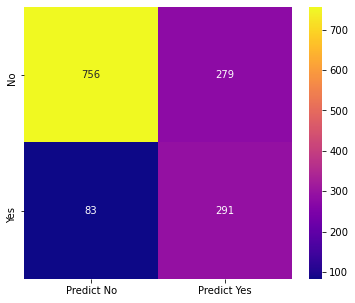

In [527]:
## Performance Matrix on test data set
print('Testing score:',ADB_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The Ada Boost model is giving slightly better 74% accuracy on testing data**

**The Precision for the class 1 has improvev to 51% where as recall is giving score of 78%**

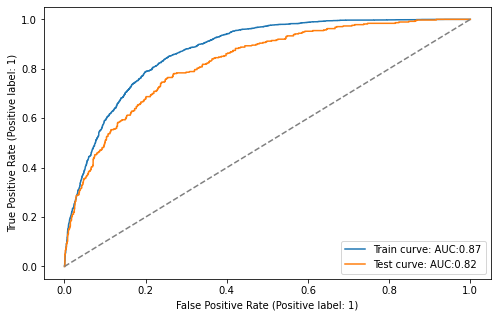

In [706]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = ADB_model.predict_proba(X_train_res)
test_predict_prob = ADB_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(ADB_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(ADB_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

**Slightly improved as compare to other but still precision is low**

## Gradient Boosting Classifier

In [566]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(learning_rate=0.5, warm_start=True,
                                 min_samples_split=30,
                                 min_samples_leaf=15,
                                 min_weight_fraction_leaf=0.0,
                                 max_depth=3,)
gbcl.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=0.5, min_samples_leaf=15,
                           min_samples_split=30, warm_start=True)

In [567]:
ytrain_predict = gbcl.predict(X_train_res)
ytest_predict = gbcl.predict(X_test)
gbcl_train_score = gbcl.score(X_train_res, y_train_res).round(3)
gbcl_test_score = gbcl.score(X_test, y_test).round(3)
print(gbcl_train_score)
print(gbcl_test_score)

0.88
0.758


Testing score: 0.758


              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.53      0.68      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



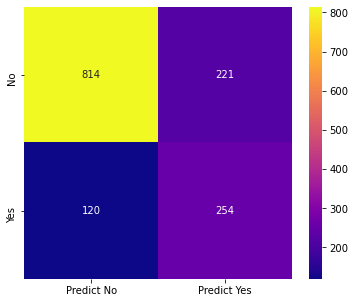

In [568]:
## Performance Matrix on test data set
print('Testing score:',gbcl_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The Gradient Boosting model is giving 76% accuracy on testing data**

**The Precision for the class 1 has improvev to 53% where as recall is giving score of 68%**

**Till now this model is giving a very good score as compare to above model for class 1 and also improved in predicting false positive**

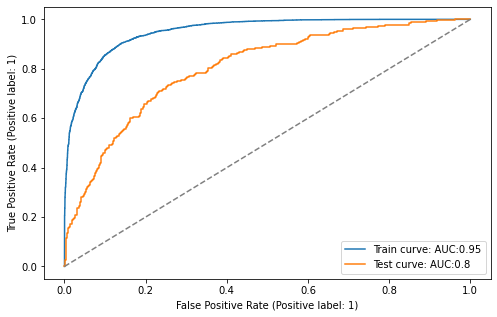

In [707]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = gbcl.predict_proba(X_train_res)
test_predict_prob = gbcl.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(gbcl, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(gbcl,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

**This model is giving a better score on precision and recall till now**

## Naive Bayes Model

In [570]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train_res, y_train_res)

GaussianNB()

In [571]:
ytrain_predict = NB_model.predict(X_train_res)
ytest_predict = NB_model.predict(X_test)
NB_train_score = NB_model.score(X_train_res, y_train_res).round(3)
NB_test_score = NB_model.score(X_test, y_test).round(3)
print(NB_train_score)
print(NB_test_score)

0.763
0.679


Testing score: 0.679


              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1035
           1       0.44      0.80      0.57       374

    accuracy                           0.68      1409
   macro avg       0.67      0.72      0.66      1409
weighted avg       0.78      0.68      0.70      1409



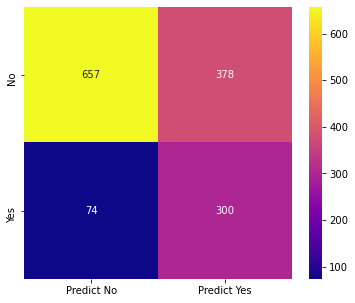

In [572]:
## Performance Matrix on test data set
print('Testing score:',NB_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The Naive Bayes Model is giving poor accuracy of 68% on testing data**

**The Precision for the class 1 is 44% where as recall is giving score of 80%**

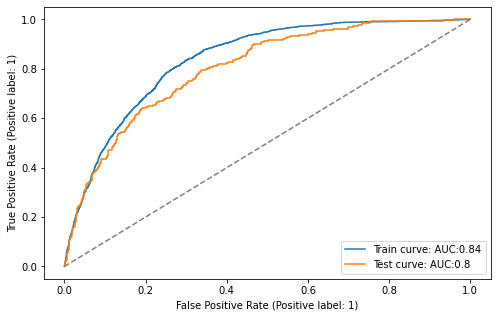

In [709]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = NB_model.predict_proba(X_train_res)
test_predict_prob = NB_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(NB_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(NB_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## KNN Model

In [637]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train_res,y_train_res)

KNeighborsClassifier(n_neighbors=10)

In [638]:
ytrain_predict = KNN_model.predict(X_train_res)
ytest_predict = KNN_model.predict(X_test)
KNN_train_score = KNN_model.score(X_train_res, y_train_res).round(3)
KNN_test_score = KNN_model.score(X_test, y_test).round(3)
print(KNN_train_score)
print(KNN_test_score)

0.831
0.708


Testing score: 0.708


              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1035
           1       0.47      0.72      0.57       374

    accuracy                           0.71      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.77      0.71      0.72      1409



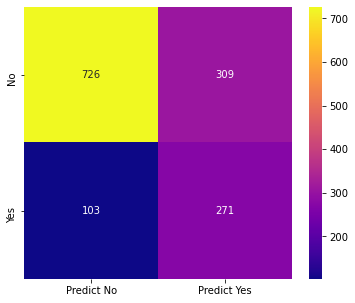

In [639]:
 ## Performance Matrix on test data set
print('Testing score:',KNN_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The Naive Bayes Model is giving accuracy of 71% on testing data**

**The Precision for the class 1 is 47% where as recall is giving score of 72%**

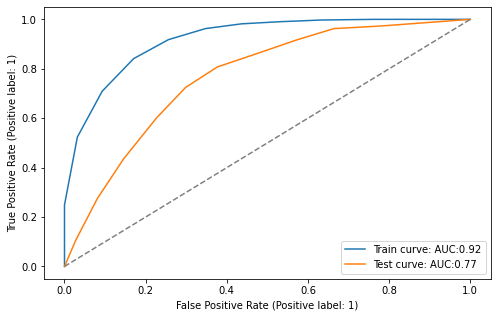

In [708]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = KNN_model.predict_proba(X_train_res)
test_predict_prob = KNN_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(KNN_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(KNN_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## Logistic Model

In [588]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( max_iter=5000)
lr_model = lr.fit(X_train_res,y_train_res)

In [590]:
ytrain_predict = lr_model.predict(X_train_res)
ytest_predict = lr_model.predict(X_test)
lr_train_score = lr_model.score(X_train_res, y_train_res).round(3)
lr_test_score = lr_model.score(X_test, y_test).round(3)
print(lr_train_score)
print(lr_test_score)

0.782
0.738


Testing score: 0.738


              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.50      0.74      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409



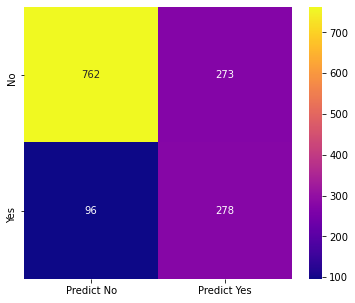

In [591]:
 ## Performance Matrix on test data set
print('Testing score:',lr_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The Logistic Model is giving accuracy of 74% on testing data**

**The Precision for the class 1 is 50% where as recall is giving score of 74 which needs to be improve**

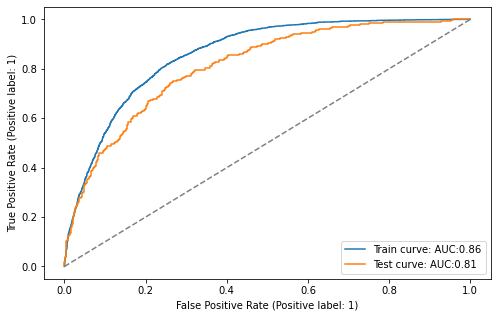

In [710]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = lr_model.predict_proba(X_train_res)
test_predict_prob = lr_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(lr_model, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(lr_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## Applying GridSearchCV on Gradient Boosting Classifier

In [610]:
grid_model_gbcl = GradientBoostingClassifier(random_state=1)

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.5, 0.1],
    "min_samples_leaf": [3,4],
    "max_depth":[3],
    "max_features":["log2","sqrt"],
    'subsample': [0.7,0.8],
    "n_estimators":[800,1000]}

In [611]:
#we make use of the random search to get baseline parameters for the model.
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=grid_model_gbcl,
                               param_distributions=parameters,
                               scoring='roc_auc',
                               cv=10, n_iter=30, 
                               n_jobs = -1, verbose = 1, 
                               random_state=42)

In [612]:
random_cv.fit(X_train_res,y_train_res)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': [0.5, 0.1],
                                        'loss': ['deviance'], 'max_depth': [3],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [3, 4],
                                        'n_estimators': [800, 1000],
                                        'subsample': [0.7, 0.8]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [613]:
random_cv.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 3,
 'loss': 'deviance',
 'learning_rate': 0.1}

In [614]:
best_grid = random_cv.best_estimator_

In [615]:
ytrain_predict = best_grid.predict(X_train_res)
ytest_predict = best_grid.predict(X_test)
gridCV_train_score = best_grid.score(X_train_res, y_train_res).round(3)
gridCV_test_score = best_grid.score(X_test, y_test).round(3)
print(gridCV_train_score)
print(gridCV_test_score)

0.883
0.744


Testing score: 0.744


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1035
           1       0.51      0.67      0.58       374

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.74      0.75      1409



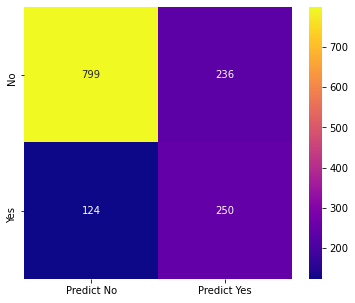

In [617]:
 ## Performance Matrix on test data set
print('Testing score:',gridCV_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

*Testing data accuracy on grid search: 74% due to high variance in the dataset and class imbalance*

*Classificatio report summary:*

  The precision and recall is very good for predicting 'Not Churn' is 87% and 77% respectivily 

  The precision and recall is also good for predicting 'Churn' is 51% and 67% respectivily 

*Confusion matrix summary:*

True Positives (TP): we correctly predicted for Pass is 250

True Negatives (TN): we correctly predicted for Fail is 799

False Positives (FP): we incorrectly predicted for Pass is (a "Type I error") 236 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Fail is (a "Type II error") 124 Falsely predict negative Type II error

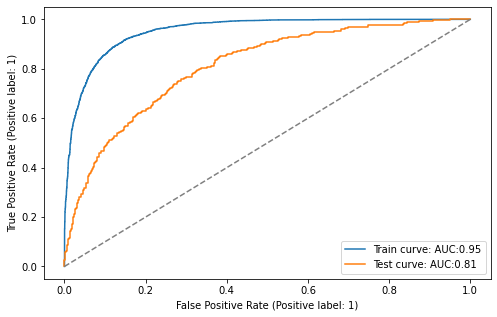

In [711]:
# ROC and AUC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
train_predict_prob = best_grid.predict_proba(X_train_res)
test_predict_prob = best_grid.predict_proba(X_test)
AUC_train = roc_auc_score(y_train_res, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(best_grid, X_train_res, y_train_res, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(best_grid,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## Support Vector Machine

In [618]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc_model = svc.fit(X_train_res,y_train_res)

In [619]:
ytrain_predict = svc_model.predict(X_train_res)
ytest_predict = svc_model.predict(X_test)
svc_train_score = svc_model.score(X_train_res, y_train_res).round(3)
svc_test_score = svc_model.score(X_test, y_test).round(3)
print(svc_train_score)
print(svc_test_score)

0.835
0.736


Testing score: 0.736


              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1035
           1       0.50      0.74      0.60       374

    accuracy                           0.74      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.78      0.74      0.75      1409



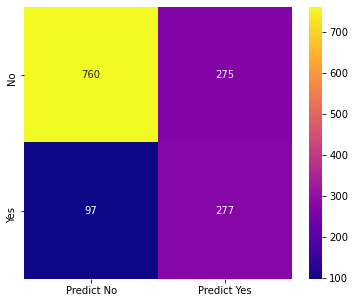

In [620]:
 ## Performance Matrix on test data set
print('Testing score:',svc_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict No', 'Predict Yes']], index=[i for i in ['No','Yes']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

**The SVM model has given 83% and 74% for both the training and testing data**

**where as the precision and recall for the class 1 is 50% and 74% respectively**

## Comparison of Different Models

In [623]:
model_comparision = pd.DataFrame({'Method':['Decision Tree','Random Forest', 'Bagging','LDA','Ada Boost','Gradient Boost','Naive Bayes',
                                  'KNN Model','Random search GBCL','SVM'],
                                  'Train_Accuracy': [dTree_train_score,rf_train_score,Bagg_train_score,LDA_train_score,
                                  ADB_train_score,gbcl_train_score, NB_train_score,KNN_train_score, gridCV_train_score,svc_train_score],
                                  'Test_Accuracy': [dTree_test_score,rf_test_score,Bagg_test_score,LDA_test_score,
                                  ADB_test_score,gbcl_test_score, NB_test_score,KNN_test_score,gridCV_test_score, svc_test_score]})

In [624]:
model_comparision = model_comparision[['Method', 'Train_Accuracy','Test_Accuracy']]
model_comparision

,Method,Train_Accuracy,Test_Accuracy
0,Decision Tree,1.000,0.713
1,Random Forest,0.868,0.746
2,Bagging,0.950,0.753
3,LDA,0.778,0.733
4,Ada Boost,0.795,0.743
5,Gradient Boost,0.880,0.758
6,Naive Bayes,0.763,0.679
7,KNN Model,0.792,0.688
8,Random search GBCL,0.883,0.744
9,SVM,0.835,0.736


## Using Cross Validation Techinique

In [640]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbcl, X_train_res, y_train_res, cv=10)
scores

array([0.74516908, 0.74516908, 0.70531401, 0.81763285, 0.84541063,
       0.85024155, 0.852657  , 0.86956522, 0.86215236, 0.8573156 ])

In [641]:
scores = cross_val_score(Bagg_model, X_test, y_test, cv=10)
scores

array([0.80141844, 0.73758865, 0.81560284, 0.80141844, 0.78014184,
       0.80141844, 0.72340426, 0.81560284, 0.78014184, 0.78571429])

In [643]:
print('Accuracy: %.3f%% (%.3f%%)' % (scores.mean()*100, scores.std()*100))

Accuracy: 78.425% (2.961%)


**Concl:**

**1. After applying SMOTE on the imbalanced dataset and comparing all the above model I found applied Random search on Gredient Beesting model which is giving good accuracy for training data which is average 78% after doing cross validation where as precision and recall for class 1 is 53% and 68% respectivily** 

**2. Gradient Boosting has done well on testing data for improving the precision on the testing data i.e 53%** 

**3.Model selection: I will be picking these two for furure use**

## Pickle the selected model for future use

In [645]:
import os
os.chdir('F:\Project AIML to submit\Ensemble')
import pickle
filename = 'ajay.pras'
pickle.dump(gbcl, open(filename, 'wb'))

I have pickle the file in above mentioned location for future use

## 6. GUI development
• Design a clickable GUI desk application or web service application.

• This GUI should allow the user to input all future values and on a click use these values on the trained model above to predict.

• It should display the prediction.

In [647]:
# Library
import matplotlib
matplotlib.use('Agg')

import tkinter as tk
from tkinter import ttk
import pandas as pd
import re


# App window
win = tk.Tk()
win.title('CLASSIFIER GUI - Great Learning')  # Window Title

# Step 1: Import data frame name ---------------------------------

Name=ttk.Label(win,text="Step 1: File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)

def Import_Data():
    global DB
    DF_Name=Name_var.get()
    DB_extension=re.findall("\..*", DF_Name) 
    if DB_extension==['.xlsx']:
        DB=pd.read_excel(DF_Name)
    elif DB_extension==['.csv']:
        DB=pd.read_csv(DF_Name)
    # Blank empty window to print confirmation
    confirm="Done"
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=0,column=3)
    Confirm_entrybox.insert(1,str(confirm))   

Import_Data_Button=ttk.Button(win,text="Import Data",command=Import_Data)
Import_Data_Button.grid(row=0,column=2)


# Step 2: Target data frame name ---------------------------------

Target=ttk.Label(win,text="Step 2: Target Colummn")
Target.grid(row=1,column=0,sticky=tk.W)

Target_var=tk.StringVar()
Target_entrybox=ttk.Entry(win,width=16,textvariable=Target_var)
Target_entrybox.grid(row=1,column=1)

def Target_Data():
    global DB,X,y, Target_Name, X_train, X_test, y_train, y_test
    Target_Name=Target_var.get()
    
    Column_name=DB.columns
    Column_name
    found=0

    for i in range(len(Column_name)):
        if Column_name[i]==Target_Name:
            confirm="Found"
            y = DB[Target_Name]                # Target variable
            X = DB.drop(Target_Name,axis=1)    # Predictor variable
            # Train and text split
            from sklearn.model_selection import train_test_split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9,shuffle=True)


        else:
            confirm="Not Found"
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=1,column=3)
    Confirm_entrybox.insert(1,str(confirm))


Target_Button=ttk.Button(win,text="IMPORT DATA",command=Target_Data)
Target_Button.grid(row=1,column=2)


# Step 3: Modelling ---------------------------------

Modelling=ttk.Label(win,text="Step 3: Supervised learning Models")
Modelling.grid(row=2,column=0,sticky=tk.W)


# 1. Logostic regression
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR=ttk.Label(win,text="Logistic Regression")
LR.grid(row=3,column=0,sticky=tk.E)


def LOGR():
    global DB,X,y,LogR_model
    
    # Logistic Regression
    LogR_model = LogisticRegression()
    LogR_model.fit(X_train, y_train)
    y_pred=LogR_model.predict(X_train)
    LogR_Accuracy_Train = 100*round(accuracy_score(y_true=y_train, y_pred=y_pred),2)
    LR_Tr=str(LogR_Accuracy_Train)

    y_pred = LogR_model.predict(X_test)
    LogR_Accuracy_Test = 100*round(accuracy_score(y_true=y_test, y_pred=y_pred),2)
    LR_Te=str(LogR_Accuracy_Test)
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=3,column=2)
    Confirm_entrybox.insert(1,str("Train Accuracy: "+LR_Tr+"%"))
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=3,column=3)
    Confirm_entrybox.insert(1,str("Test Accuracy: "+LR_Te+"%"))

LR_Button=ttk.Button(win,text="RUN",command=LOGR)
LR_Button.grid(row=3,column=1)

# 2. Naive Bayes
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score

NB=ttk.Label(win,text="Naive Bayes")
NB.grid(row=4,column=0,sticky=tk.E)


def NB():
    global DB,X,y,NB_model
    
    # Naive Bayes
    NB_model = GaussianNB()
    NB_model.fit(X_train, y_train)

    y_pred=NB_model.predict(X_train)
    NB_Accuracy_Train = 100*round(accuracy_score(y_true=y_train, y_pred=y_pred),2)
    NB_Tr=str(NB_Accuracy_Train)

    y_pred = NB_model.predict(X_test)
    NB_Accuracy_Test = 100*round(accuracy_score(y_true=y_test, y_pred=y_pred),2)
    NB_Te=str(NB_Accuracy_Test)
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=4,column=2)
    Confirm_entrybox.insert(1,str("Train Accuracy: "+NB_Tr+"%"))
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=4,column=3)
    Confirm_entrybox.insert(1,str("Test Accuracy: "+NB_Te+"%"))

NB_Button=ttk.Button(win,text="RUN",command=NB)
NB_Button.grid(row=4,column=1)


# 3. SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM=ttk.Label(win,text="Support Vector Machine")
SVM.grid(row=5,column=0,sticky=tk.E)

SVM_kernel=ttk.Label(win,text="Kernel")
SVM_kernel.grid(row=5,column=4,sticky=tk.E)

SVM_kernel_var=tk.StringVar()
SVM_kernel_entrybox=ttk.Entry(win,width=16,textvariable=SVM_kernel_var)
SVM_kernel_entrybox.grid(row=5,column=5)

SVM_C=ttk.Label(win,text="Cost")
SVM_C.grid(row=5,column=6,sticky=tk.E)

SVM_C_var=tk.IntVar()
SVM_C_entrybox=ttk.Entry(win,width=16,textvariable=SVM_C_var)
SVM_C_entrybox.grid(row=5,column=7)


def SVM():
    global DB,X,y,SVM_model
    
    # SVM
    Kernel=SVM_kernel_var.get()
    Cost=SVM_C_var.get()
    SVM_model= SVC(C=Cost,kernel=Kernel)
    SVM_model.fit(X_train, y_train)
    
    y_pred=SVM_model.predict(X_train)
    SVM_Accuracy_Train = 100*round(accuracy_score(y_true=y_train, y_pred=y_pred),2)
    SVM_Tr=str(SVM_Accuracy_Train)

    y_pred = SVM_model.predict(X_test)
    SVM_Accuracy_Test = 100*round(accuracy_score(y_true=y_test, y_pred=y_pred),2)
    SVM_Te=str(SVM_Accuracy_Test)
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=5,column=2)
    Confirm_entrybox.insert(1,str("Train Accuracy: "+SVM_Tr+"%"))
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=5,column=3)
    Confirm_entrybox.insert(1,str("Test Accuracy: "+SVM_Te+"%"))

SVM_Button=ttk.Button(win,text="RUN",command=SVM)
SVM_Button.grid(row=5,column=1)

# 4. Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

DT=ttk.Label(win,text="Decision Tree")
DT.grid(row=6,column=0,sticky=tk.E)

DT_Criteria=ttk.Label(win,text="Criteria")
DT_Criteria.grid(row=6,column=4,sticky=tk.E)

DT_Criteria_var=tk.StringVar()
DT_Criteria_entrybox=ttk.Entry(win,width=16,textvariable=DT_Criteria_var)
DT_Criteria_entrybox.grid(row=6,column=5)

DT_Maxdept=ttk.Label(win,text="Max Depth")
DT_Maxdept.grid(row=6,column=6,sticky=tk.E)

DT_Maxdept_var=tk.IntVar()
DT_Maxdept_entrybox=ttk.Entry(win,width=16,textvariable=DT_Maxdept_var)
DT_Maxdept_entrybox.grid(row=6,column=7)



def DT():
    global DB,X,y,DT_model
    
    # DT
    
    Criteria=DT_Criteria_var.get()
    Depth=DT_Maxdept_var.get()
    DT_model=DecisionTreeClassifier(criterion=Criteria,splitter='best',max_depth=Depth)
    DT_model.fit(X_train, y_train)

    y_pred=DT_model.predict(X_train)
    DT_Accuracy_Train = 100*round(accuracy_score(y_true=y_train, y_pred=y_pred),2)
    DT_Tr=str(DT_Accuracy_Train)

    y_pred = DT_model.predict(X_test)
    DT_Accuracy_Test = 100*round(accuracy_score(y_true=y_test, y_pred=y_pred),2)
    DT_Te=str(DT_Accuracy_Test)
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=6,column=2)
    Confirm_entrybox.insert(1,str("Train Accuracy: "+DT_Tr+"%"))
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=6,column=3)
    Confirm_entrybox.insert(1,str("Test Accuracy: "+DT_Te+"%"))

DT_Button=ttk.Button(win,text="RUN",command=DT)
DT_Button.grid(row=6,column=1)


# 5. Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF=ttk.Label(win,text="Random Forest")
RF.grid(row=7,column=0,sticky=tk.E)

RF_Criteria=ttk.Label(win,text="Criteria")
RF_Criteria.grid(row=7,column=4,sticky=tk.E)

RF_Criteria_var=tk.StringVar()
RF_Criteria_entrybox=ttk.Entry(win,width=16,textvariable=RF_Criteria_var)
RF_Criteria_entrybox.grid(row=7,column=5)

RF_Maxdept=ttk.Label(win,text="Maximum Depth")
RF_Maxdept.grid(row=7,column=6,sticky=tk.E)

RF_Maxdept_var=tk.IntVar()
RF_Maxdept_entrybox=ttk.Entry(win,width=16,textvariable=RF_Maxdept_var)
RF_Maxdept_entrybox.grid(row=7,column=7)

RF_Estimator=ttk.Label(win,text="N_Estimators")
RF_Estimator.grid(row=7,column=8,sticky=tk.E)

RF_Estimator_var=tk.IntVar()
RF_Estimator_entrybox=ttk.Entry(win,width=16,textvariable=RF_Estimator_var)
RF_Estimator_entrybox.grid(row=7,column=9)


def RF():
    global DB,X,y, RF_model
    
    # RF
    
    Criteria=RF_Criteria_var.get()
    Depth=DT_Maxdept_var.get()
    Estimator=RF_Estimator_var.get()
    RF_model = RandomForestClassifier(n_estimators=Estimator,criterion=Criteria, max_depth=Depth)
    RF_model.fit(X_train, y_train)

    y_pred=RF_model.predict(X_train)
    RF_Accuracy_Train = 100*round(accuracy_score(y_true=y_train, y_pred=y_pred),2)
    RF_Tr=str(RF_Accuracy_Train)

    y_pred = RF_model.predict(X_test)
    RF_Accuracy_Test = 100*round(accuracy_score(y_true=y_test, y_pred=y_pred),2)
    RF_Te=str(RF_Accuracy_Test)
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=7,column=2)
    Confirm_entrybox.insert(1,str("Train Accuracy: "+RF_Tr+"%"))
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=7,column=3)
    Confirm_entrybox.insert(1,str("Test Accuracy: "+RF_Te+"%"))

RF_Button=ttk.Button(win,text="RUN",command=RF)
RF_Button.grid(row=7,column=1)


# 6. ADA Boosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

ADB=ttk.Label(win,text="ADA Boosting")
ADB.grid(row=8,column=0,sticky=tk.E)

ADB_Criteria=ttk.Label(win,text="Estimator")
ADB_Criteria.grid(row=8,column=4,sticky=tk.E)

ADB_Estimator_var=tk.IntVar()
ADB_Estimator_entrybox=ttk.Entry(win,width=16,textvariable=ADB_Estimator_var)
ADB_Estimator_entrybox.grid(row=8,column=5)


def ADBoost():
    global DB,X,y, ADB_model
    
    N_Estimator=ADB_Estimator_var.get()
    ADB_model = AdaBoostClassifier(n_estimators=N_Estimator)
    ADB_model.fit(X_train, y_train)

    y_pred=ADB_model.predict(X_train)
    ADB_Accuracy_Train = 100*round(accuracy_score(y_true=y_train, y_pred=y_pred),2)
    ADB_Tr=str(ADB_Accuracy_Train)

    y_pred = ADB_model.predict(X_test)
    ADB_Accuracy_Test = 100*round(accuracy_score(y_true=y_test, y_pred=y_pred),2)
    ADB_Te=str(ADB_Accuracy_Test)
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=8,column=2)
    Confirm_entrybox.insert(1,str("Train Accuracy: "+ADB_Tr+"%"))
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=8,column=3)
    Confirm_entrybox.insert(1,str("Test Accuracy: "+ADB_Te+"%"))

ADB_Button=ttk.Button(win,text="RUN",command=ADBoost)
ADB_Button.grid(row=8,column=1)

# Pickle the model

PIC=ttk.Label(win,text="Model Freeze")
PIC.grid(row=9,column=0,sticky=tk.W)

def PICKLE():
    import pickle
    filename = 'Logistic Regression.sav'
    pickle.dump(LogR_model, open(filename, 'wb'))
    
    filename = 'Naive Bayes.sav'
    pickle.dump(NB_model, open(filename, 'wb'))
    
    filename = 'SVM .sav'
    pickle.dump(SVM_model, open(filename, 'wb')) 
    
    filename = 'Decision Tree.sav'
    pickle.dump(DT_model, open(filename, 'wb'))
    
    filename = 'Random Forest.sav'
    pickle.dump(RF_model, open(filename, 'wb'))
    
    filename = 'ADA Boosting.sav'
    pickle.dump(ADB_model, open(filename, 'wb'))
    
    Confirm_entrybox=ttk.Entry(win,width=16)
    Confirm_entrybox.grid(row=9,column=2)
    Confirm_entrybox.insert(1,str("Done"))
    
ADB_Button=ttk.Button(win,text="Execute",command=PICKLE)
ADB_Button.grid(row=9,column=1)




win.mainloop()

**A clickable GUI desk application or web service application was developed using tkinter library which can be used for future use**

## 7. Conclusion and improvisation:
    
• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the 
telecom operator to perform a better data analysis in future.

**Final Conclusion**

The following can be interpreted on data collected for telecom company who wants to use their historical customer data to predict behaviour to retain customers. is as follow:


1. Most of the features of the dataset having categorical in natute except only 4. There is a high variance in the Dataste and the class for the target variable where also imbalanced which leading to overfitting the model during the testing.


2. During EDA and visualization it is found that categorical features are good participating in the target prediction of the class expept few.


3. Model build using various machine learning algirithums has given very good score on Training data but very poor performance on testing data due to highly imbalanced class due to this the precision and recall where slightly lower on testing data.


4. SMOTE is used to balanced the class but due to very less no of observation for Churn class the model accuracy where slighly lower for the test data.


5. The Gradient Boosting Classifier is giving a good score on precision and recall for Churn class can be used for deployment purpose.

In [714]:
# # Converting ipynb to html
! jupyter nbconvert --to html Project_Ensemble_Techniques_Ajay_Kumar.ipynb

[NbConvertApp] Converting notebook Project_Ensemble_Techniques_Ajay_Kumar.ipynb to html
[NbConvertApp] Writing 4463841 bytes to Project_Ensemble_Techniques_Ajay_Kumar.html
